# Importing the Dependancies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
df = pd.read_csv("C://Users//HP//Downloads//diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Correlation checking

<Axes: >

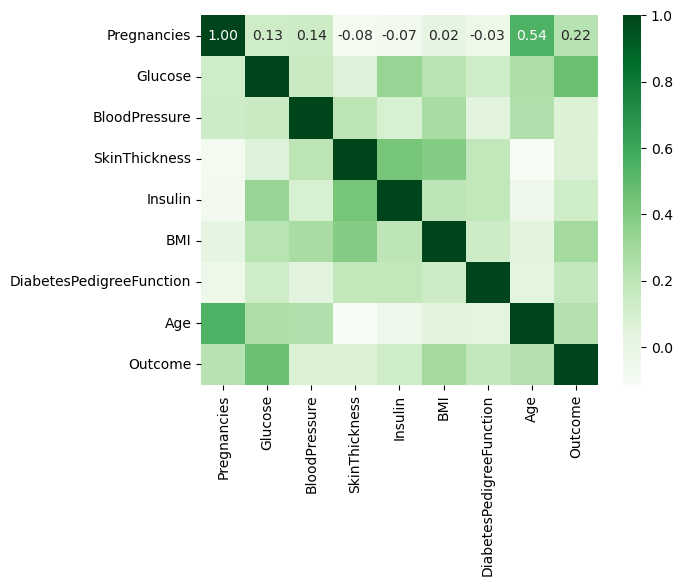

In [10]:
df_corr = df.corr()
fig = sns.heatmap(df_corr, annot= True, cmap= "Greens", fmt= "0.2f")
fig

In [11]:
# Spliting the dataset into "Features" and "Target" (X, y)
X = df.drop(columns = "Outcome")
y = df["Outcome"]
X, y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

In [12]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y = df["Outcome"]

# Train Test Spliting

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, stratify= y, random_state= 4)

In [14]:
X_scaled.shape, X_train.shape

((768, 8), (614, 8))

# Model Selection

In [15]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [16]:
def selecting_model(df, algorithm):

  X = df.drop(columns = "Outcome")
  y = df["Outcome"]

  scaler = StandardScaler()

  X_scaled = scaler.fit_transform(X)
  y = df["Outcome"]

  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, stratify= y, random_state= 4)

  model = algorithm().fit(X_train, y_train)

  y_pred_train= model.predict(X_train)
  y_pred_test= model.predict(X_test)

  #Checking the accuracy score

  train_acc_scr= accuracy_score(y_train, y_pred_train)
  test_acc_scr= accuracy_score(y_test, y_pred_test)

  print("Model Name : ", algorithm.__name__)
  print("Training Data Accuracy Score : ",train_acc_scr)
  print("Test Data Accuracy Score : ",test_acc_scr)
  print(" ")


In [17]:
selecting_model(df, DecisionTreeClassifier)
selecting_model(df, RandomForestClassifier)
selecting_model(df, AdaBoostClassifier)
selecting_model(df, ExtraTreesClassifier)
selecting_model(df, GradientBoostingClassifier)
selecting_model(df, XGBClassifier)
selecting_model(df, svm.SVC)

Model Name :  DecisionTreeClassifier
Training Data Accuracy Score :  1.0
Test Data Accuracy Score :  0.6623376623376623
 
Model Name :  RandomForestClassifier
Training Data Accuracy Score :  1.0
Test Data Accuracy Score :  0.7272727272727273
 
Model Name :  AdaBoostClassifier
Training Data Accuracy Score :  0.8436482084690554
Test Data Accuracy Score :  0.6883116883116883
 


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model Name :  ExtraTreesClassifier
Training Data Accuracy Score :  1.0
Test Data Accuracy Score :  0.7077922077922078
 
Model Name :  GradientBoostingClassifier
Training Data Accuracy Score :  0.9315960912052117
Test Data Accuracy Score :  0.6493506493506493
 
Model Name :  XGBClassifier
Training Data Accuracy Score :  1.0
Test Data Accuracy Score :  0.7012987012987013
 
Model Name :  SVC
Training Data Accuracy Score :  0.8420195439739414
Test Data Accuracy Score :  0.7142857142857143
 


In [18]:
# SVC model was perform well and with out "overfitting and underfitting"

model = svm.SVC().fit(X_train, y_train)
y_pred= model.predict(X_test)

# Model Evaluation

acc_scr = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
clas_report = classification_report(y_test, y_pred)

print("Accuracy Score : ",acc_scr)
print("")
print("Confusion Matrix")
print("----------------")
print(conf_mat)
print("")
print("Classification Report")
print("---------------------")
print(clas_report)

Accuracy Score :  0.7142857142857143

Confusion Matrix
----------------
[[75 25]
 [19 35]]

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       100
           1       0.58      0.65      0.61        54

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.72       154



In [19]:
df.iloc[568]

Pregnancies                   4.000
Glucose                     154.000
BloodPressure                72.000
SkinThickness                29.000
Insulin                     126.000
BMI                          31.300
DiabetesPedigreeFunction      0.338
Age                          37.000
Outcome                       0.000
Name: 568, dtype: float64

In [20]:
user_data = np.array([[4,154,72,29,126,31,0,37]])

user_data_scaled = scaler.fit_transform(user_data)

print(user_data)
print(user_data_scaled)

user_data_pred = model.predict(user_data_scaled)
if user_data_pred[0] == 0:
  print("The person is not Diabetic")
else:
  print("Thre person is Diabetic")

[[  4 154  72  29 126  31   0  37]]
[[0. 0. 0. 0. 0. 0. 0. 0.]]
The person is not Diabetic
